# Задание

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.

Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

Признаки:

1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

Требуется выполнить следующее задание:

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
import scipy.stats as stats

# 1. Загрузите файл HR.csv в pandas dataframe

In [ ]:
df = pd.read_csv('HR.csv')

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# 2. Рассчитайте основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [ ]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# 3. Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные

In [ ]:
# Выбираем количественные переменные
quantitative_vars = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]

# Рассчитываем корреляционную матрицу
corr_matrix = quantitative_vars.corr()
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


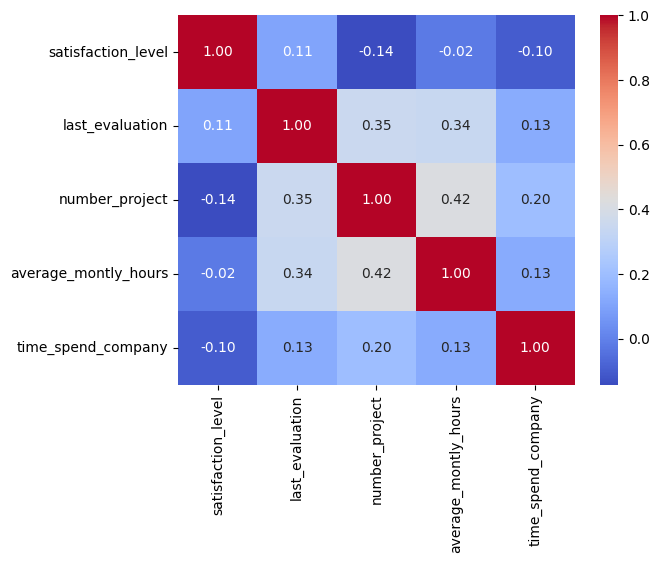

In [ ]:
# Визуализируем корреляционную матрицу
plt.figure
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

Наибольшая корелляция наблюдается между:

average_montly_hours и number_project  0.42

number_project и last_evaluation  0.35

Наименьшая корелляция наблюдается между:

number_project и satisfaction_level -0.14

satisfaction_level и time_spend_company -0.10

# 4. Рассчитайте, сколько сотрудников работает в каждом департаменте

In [ ]:
df['department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

# 5. Показать распределение сотрудников по зарплатам

In [ ]:
# Подсчет количества сотрудников по уровням зарплат
salary_distribution = df['salary'].value_counts()
salary_distribution

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

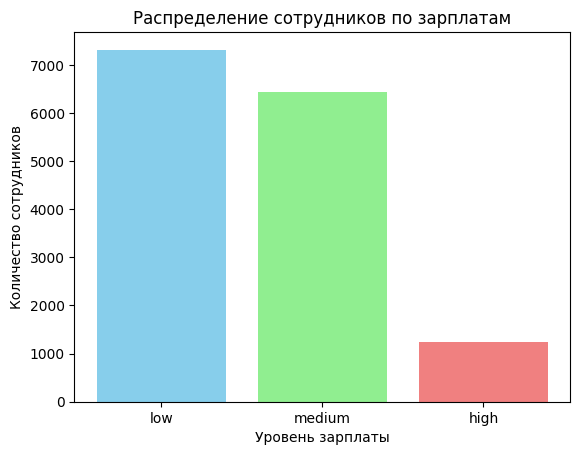

In [ ]:
# Визуализация распределения
plt.figure
plt.bar(salary_distribution.index, salary_distribution.values, color=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Распределение сотрудников по зарплатам')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')
plt.show()

# 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [ ]:
# Группируем данные по отделу и зарплате
grouped = df.groupby(['department', 'salary'])

# Считаем количество сотрудников в каждой группе
counts = grouped.size().unstack()
counts

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


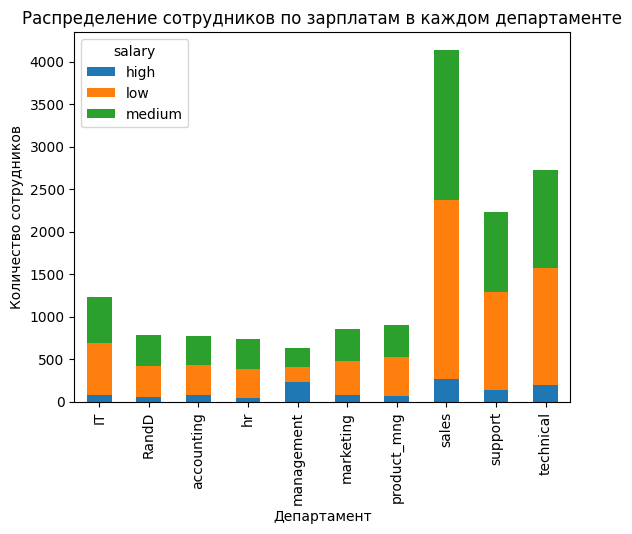

In [ ]:
# Построим график
counts.plot(kind='bar', stacked=True)

plt.xlabel('Департамент')
plt.ylabel('Количество сотрудников')
plt.title('Распределение сотрудников по зарплатам в каждом департаменте')
plt.show()

# 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким **окладом**

In [ ]:
df.groupby('salary')['average_montly_hours'].mean()

salary
high      199.867421
low       200.996583
medium    201.338349
Name: average_montly_hours, dtype: float64

In [ ]:
# Сортировка сотрудников по окладу
high_salary = df[df['salary'] == 'high']['average_montly_hours']
low_salary = df[df['salary'] == 'low']['average_montly_hours']

In [ ]:
# H0 - сотрудники с высоким окладом проводят на работе одинаковое кол-во времени как и сотрудники с низким окладом
# H1 - сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
# t-тест Стьюдента
t, p_value = stats.ttest_ind(high_salary, low_salary, alternative='greater')

print("t-тест: ", t)
print("p-значение: ", p_value)

if p_value < 0.05:
    print('отклоняем нулевую гипотезу, сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом')
else:
    print('НЕ отклоняем нулевую гипотезу, существенных различий нет')

t-тест:  -0.7288680398062308
p-значение:  0.7669488260866371
НЕ отклоняем нулевую гипотезу, существенных различий нет


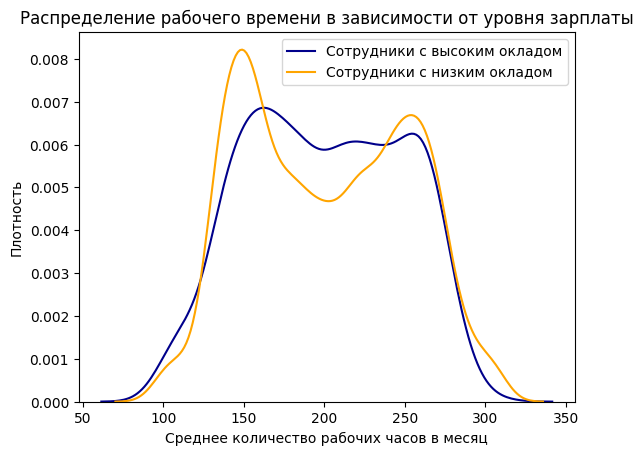

In [ ]:
# Визуализация
plt.figure
sns.kdeplot(high_salary, color='darkblue', label='Сотрудники с высоким окладом')
sns.kdeplot(low_salary, color='orange', label='Сотрудники с низким окладом')
plt.xlabel('Среднее количество рабочих часов в месяц')
plt.ylabel('Плотность')
plt.title('Распределение рабочего времени в зависимости от уровня зарплаты')
plt.legend()
plt.show()

# 8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):

-Доля сотрудников с повышением за последние 5 лет

-Средняя степень удовлетворенности

-Среднее количество проектов

In [ ]:
df.groupby('left').agg({'promotion_last_5years': 'mean', 'satisfaction_level': 'mean', 'number_project': 'mean'})

,promotion_last_5years,satisfaction_level,number_project
left,,,
0,0.026251,0.666810,3.786664
1,0.005321,0.440098,3.855503


In [ ]:
left_df = df[df['left']==1]
not_left_df = df[df['left']==0]

left_promotion_share = left_df['promotion_last_5years'].mean()
not_left_promotion_share = not_left_df['promotion_last_5years'].mean()

left_satisfaction = left_df['satisfaction_level'].mean()
not_left_satisfaction = not_left_df['satisfaction_level'].mean()

left_avg_projects = left_df['number_project'].mean()
not_left_avg_projects = not_left_df['number_project'].mean()

print('Доля сотрудников с повышением за последние 5 лет(увол):', left_promotion_share)
print('Доля сотрудников с повышением за последние 5 лет(не увол):', not_left_promotion_share)

print('Средняя степень удовлетворенности(увол):', left_satisfaction)
print('Средняя степень удовлетворенности(не увол):', not_left_satisfaction)

print('Среднее количество проектов(увол):', left_avg_projects)
print('Среднее количество проектов(не увол):', not_left_avg_projects)

Доля сотрудников с повышением за последние 5 лет(увол): 0.005320638476617194
Доля сотрудников с повышением за последние 5 лет(не увол): 0.026251312565628283
Средняя степень удовлетворенности(увол): 0.4400980117614114
Средняя степень удовлетворенности(не увол): 0.666809590479524
Среднее количество проектов(увол): 3.8555026603192384
Среднее количество проектов(не увол): 3.786664333216661


# 9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки

In [ ]:
# Исключаем 'department' и 'salary'
df_new = df.drop(['department', 'salary'], axis=1)

In [ ]:
# Задаем переменные X и y
X = df_new.drop('left', axis=1)
y = df_new['left']

# Разбиваем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Создаем экземпляр LDA и обучаем модель
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Предсказываем значения тестовой выборки
y_pred = lda.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of LDA: ', accuracy)

confusion = confusion_matrix(y_test, y_pred)
print('Confusion matrix: \n', confusion)

Accuracy of LDA:  0.7533333333333333
Confusion matrix: 
 [[2094  200]
 [ 540  166]]


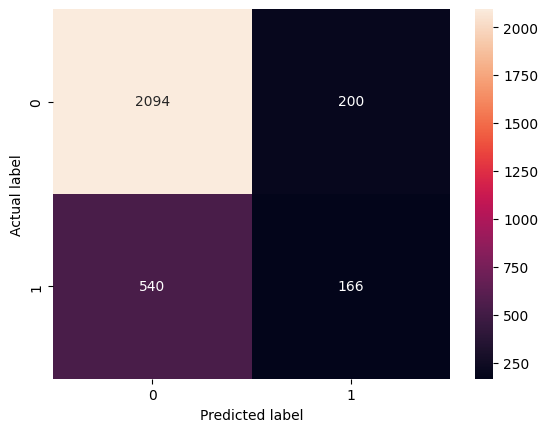

In [ ]:
sns.heatmap(confusion, annot=True, fmt="d")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

 В данном случае точность правильных предсказаний составляет 0.7533 или 75.33%, что означает, что модель правильно предсказала, уволится сотрудник или нет, в 75.33% случаев.

2094 - Это количество сотрудников, которые действительно остались в компании, и модель правильно предсказала, что они останутся.

200 - Это количество сотрудников, которые действительно остались в компании, но модель ошибочно предсказала, что они уволятся.

540 - Это количество сотрудников, которые уволились, но модель ошибочно предсказала, что они останутся.

166 - Это количество сотрудников, которые действительно уволились, и модель правильно предсказала, что они уволятся.

Исходя из этой матрицы, можно сказать, что модель намного лучше предсказывает оставшихся сотрудников, чем уволившихся.